Выбор датасета:

Четный номер в группе - Датасет [о вине](https://www.kaggle.com/datasets/davorbudimir/winedataset)

Нечетный номер в группе - Датасет [про диабет](https://www.kaggle.com/datasets/abdallamahgoub/diabetes/data)

У меня 9 номер в группе — беру датасет про диабет.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix
from typing import Self
from random import choice


In [2]:
ds = pd.read_csv("../res/diabetes.csv")
ds  # dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


- Проведите предварительную обработку данных, включая обработку отсутствующих
  значений, кодирование категориальных признаков и масштабирование.

In [3]:
ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


все типы распознаются, так что остается проверить на NaN'ы

In [4]:
ds.isna().any()
# ds = ds.dropna()


Pregnancies      False
Glucose          False
BloodPressure    False
SkinThickness    False
Insulin          False
BMI              False
Pedigree         False
Age              False
Outcome          False
dtype: bool

Отсутствующих значений нет, кодировать числовые признаки, кажется, не нужно. Остается масштабирование. 

In [5]:
ds_scaled = StandardScaler().fit(ds).transform(ds)


- Получите и визуализируйте (графически) статистику по датасету (включая
  количество, среднее значение, стандартное отклонение, минимум, максимум и
  различные квантили), постройте 3d-визуализацию признаков.

In [6]:
ds.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


interval columns not set, guessing: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pedigree', 'Age', 'Outcome']


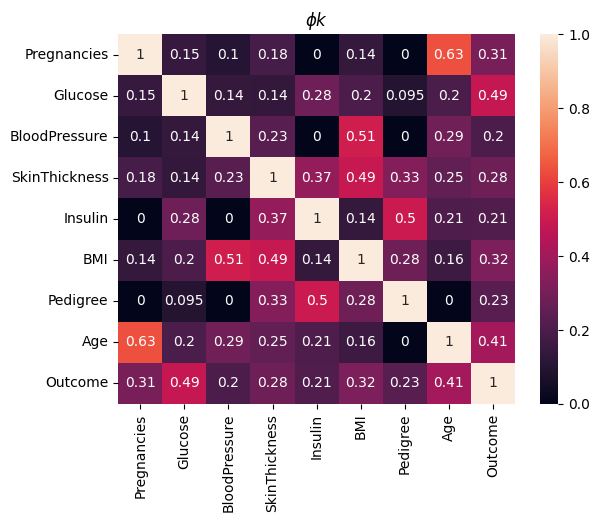

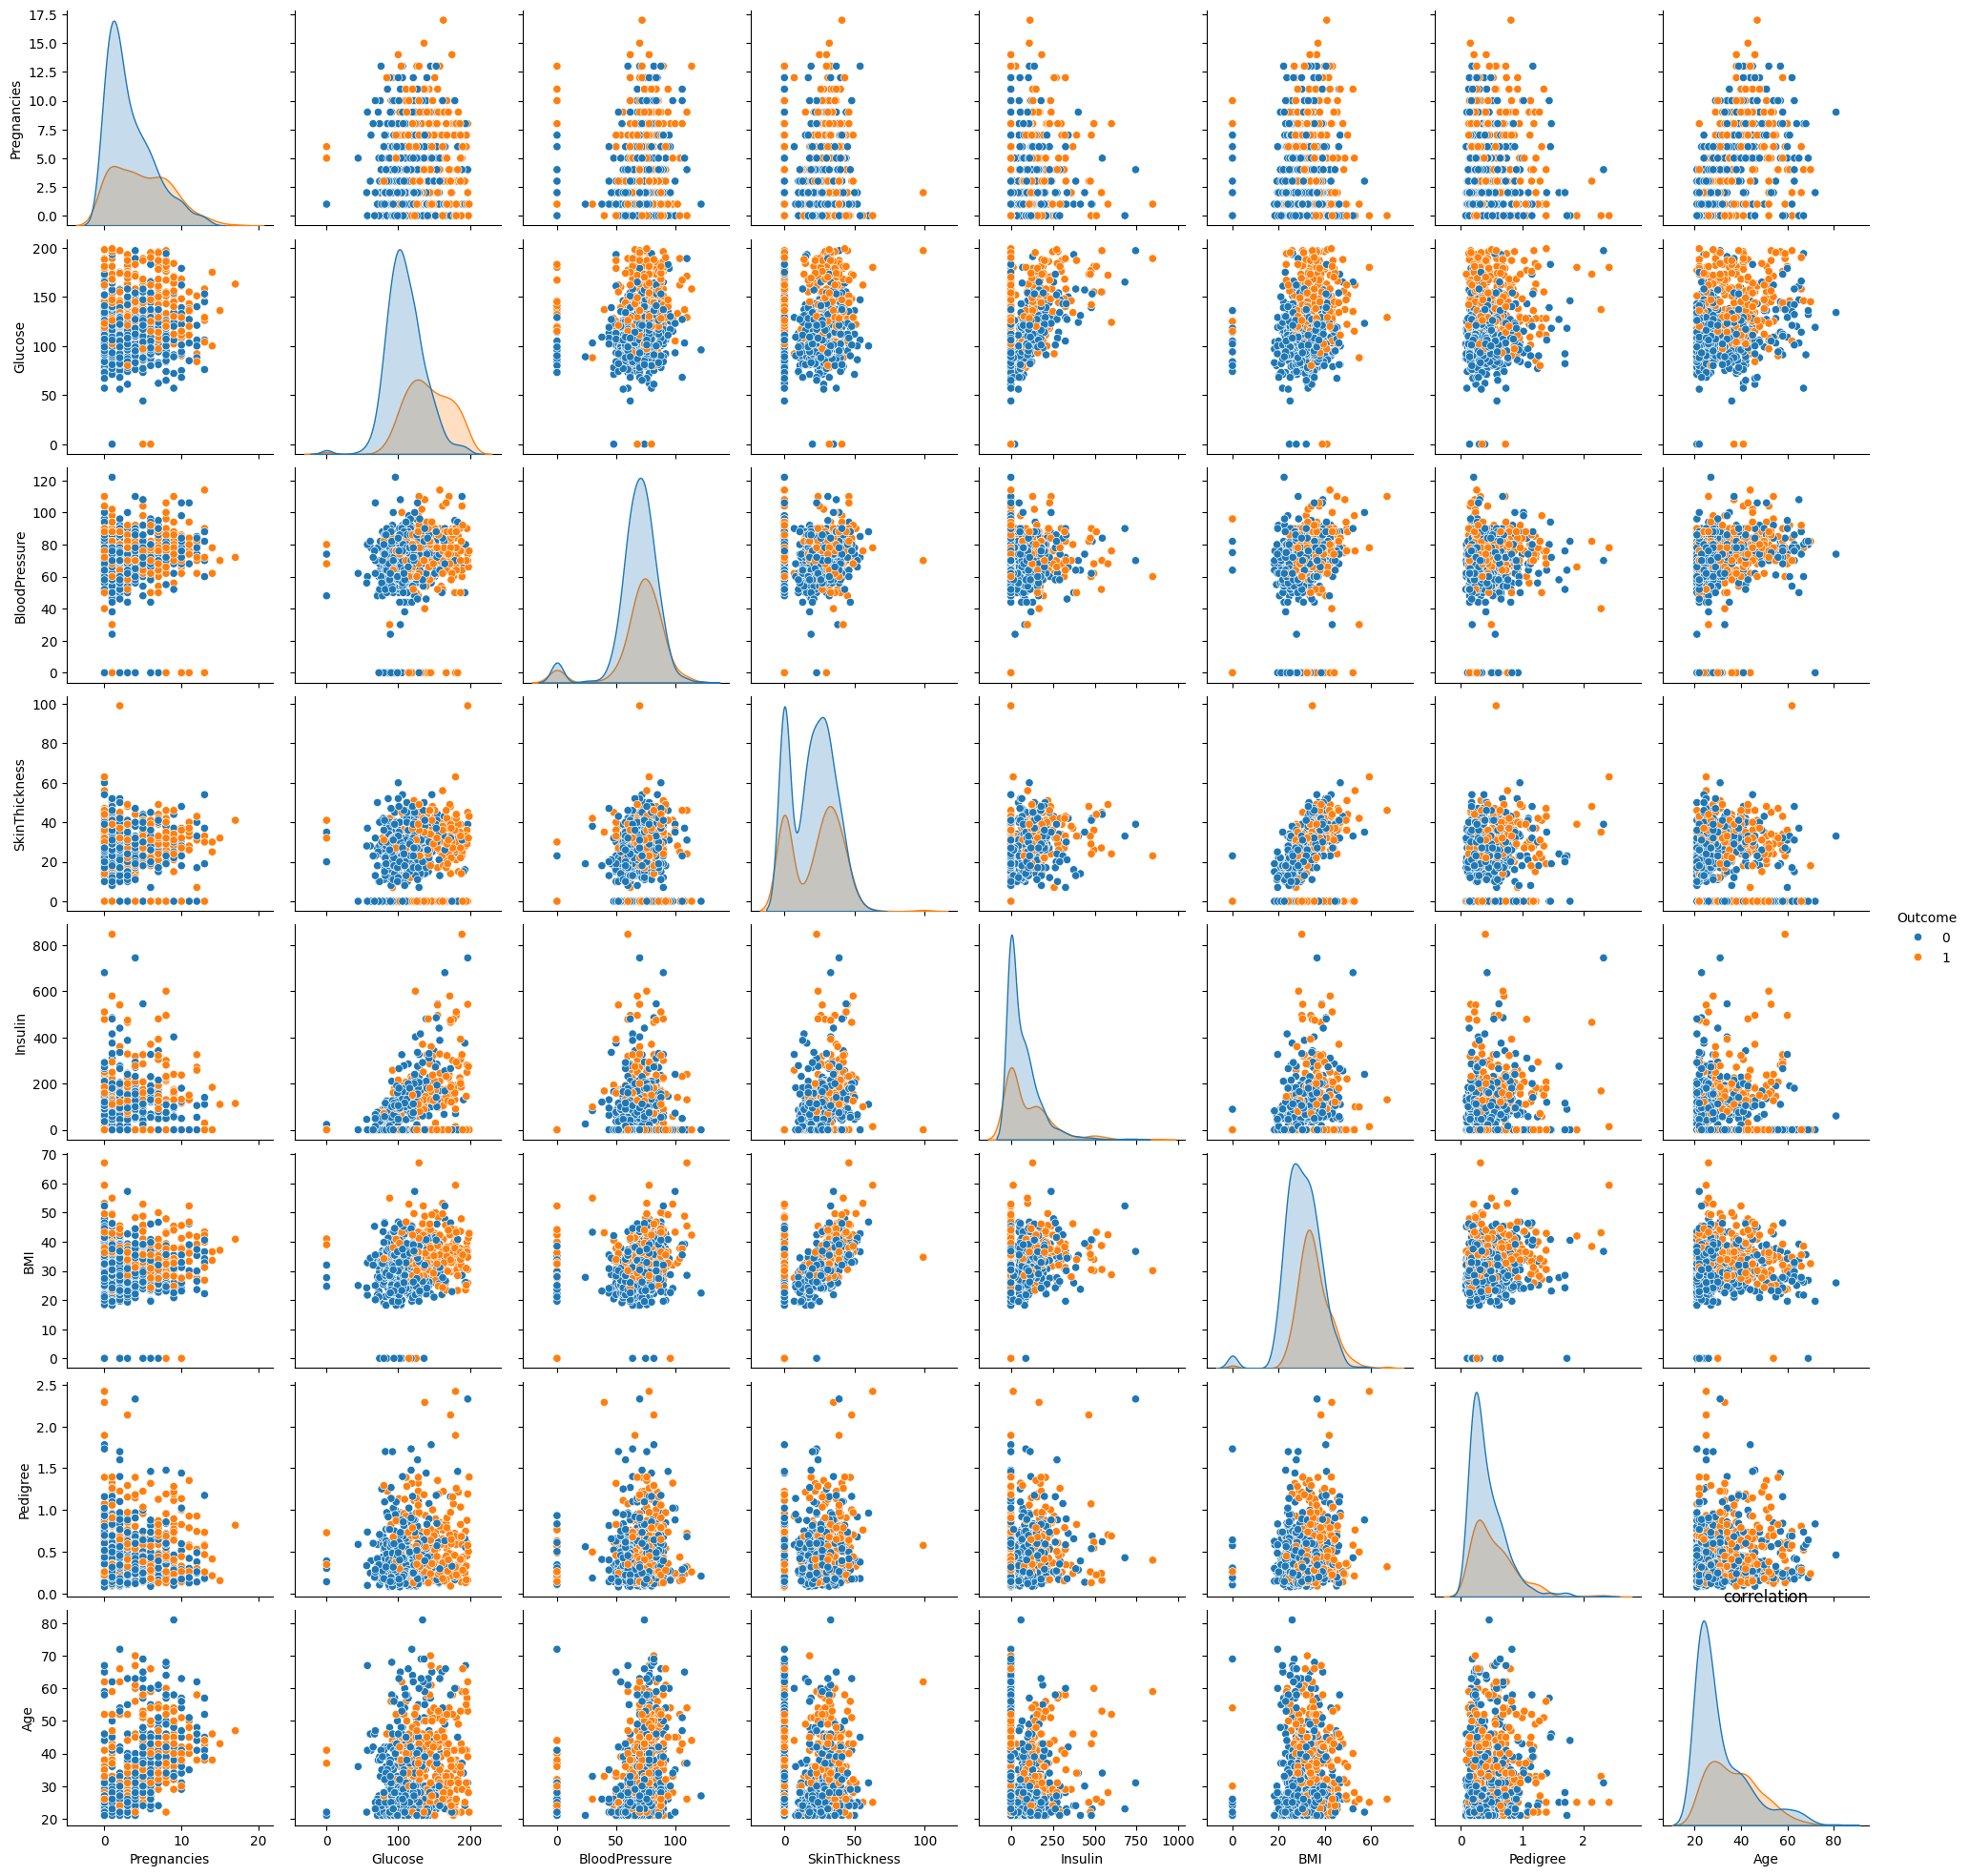

In [7]:
sns.heatmap(ds.phik_matrix(), annot=True)
plt.title("$\phi k$")
plt.show()

sns.pairplot(ds, hue="Outcome")
plt.title("correlation")
plt.show()


Смотря на гистограммы можно сказать, что датасет, в принципе, сбалансированный: распределения нормальные +-, есть пики в некоторых признаках, `Outcome` соотносится $\approx 2:1$ (с этим, возможно, нужно будет что-то делать). Видно, что класы визуально плохо отделяются, хотя и есть некоторая *грань*.

Не знаю зачем нужен 3D-график, тот, что выше, уже трехмерный из-за цвета = `Outcome`. Вот пример обычного 3D так же с цветом целевого класса.

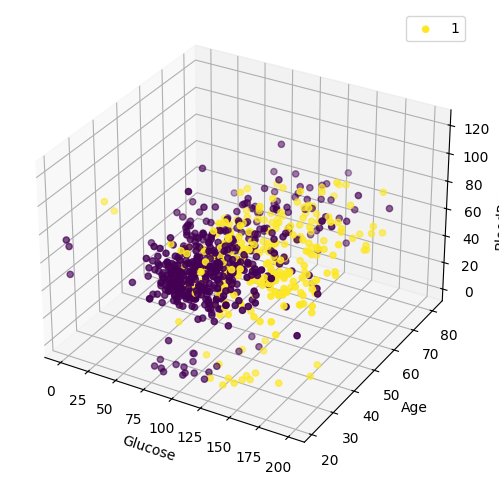

In [8]:
ax = plt.figure(figsize=(6, 6)).add_subplot(111, projection="3d")
ax.scatter(ds["Glucose"], ds["Age"], ds["BloodPressure"], c=ds["Outcome"])
ax.set_xlabel("Glucose")
ax.set_ylabel("Age")
ax.set_zlabel("BloodPressure")
ax.legend(ds["Outcome"])

plt.show()


- Реализуйте метод k-ближайших соседей без использования сторонних библиотек,
  кроме NumPy и Pandas.

In [9]:
# from sklearn.neighbors import KNeighborsClassifier
# KNeighborsClassifier().fi
k = ds.iloc[0]
print(k)


Pregnancies        6.000
Glucose          148.000
BloodPressure     72.000
SkinThickness     35.000
Insulin            0.000
BMI               33.600
Pedigree           0.627
Age               50.000
Outcome            1.000
Name: 0, dtype: float64


In [10]:
def most_common(l: list):
    return max(set(l), key=l.count)


def euclidean(point: pd.DataFrame, data: pd.DataFrame):
    # Euclidean distance between points a & data
    return np.sqrt(np.sum((point - data) ** 2, axis=1))


class MyKNeighborsClassifier:
    def __init__(self, k: int = 2, metric=euclidean):
        self.k = k
        self.metric = metric

    def fit(self, X: pd.DataFrame, y: pd.Series):
        self.X_train = X
        self.y_train = y

        return self

    def predict(self, X: pd.DataFrame):
        neighbors = [None for _ in range(len(X))]

        for i, point in enumerate(X):
            distances: pd.DataFrame = self.metric(point, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors[i] = most_common(y_sorted[: self.k])

        return neighbors

    def evaluate(self, X: pd.DataFrame, y: pd.Series):
        y_pred = self.predict(X)
        accuracy = sum(y_pred == y) / len(y)
        return accuracy


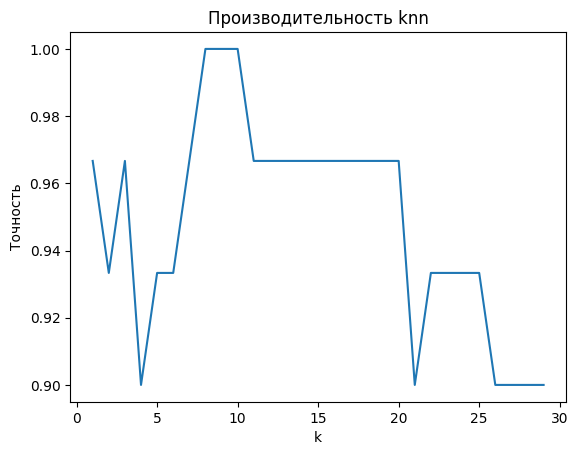

In [11]:

from sklearn import datasets

iris = datasets.load_iris()
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)

accuracies = []
ks = range(1, 30)
for k in ks:
    knn = MyKNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)

fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Точность",
       title="Производительность knn")
plt.show()

- Постройте две модели k-NN с различными наборами признаков:
    - Модель 1: Признаки случайно отбираются.
    - Модель 2: Фиксированный набор признаков, который выбирается заранее.

In [12]:
fs = ds.drop('Outcome', axis=1) # features set
ts = ds['Outcome']      # target set
ds_m1 = fs.sample(n=4, axis='columns')
ds_m2 = fs[[
    # 'BloodPressure', 
    # 'Pregnancies',
    # 'Glucose',
    'BloodPressure',
    # 'SkinThickness',
    'Insulin',
    'BMI',
    'Pedigree',
    'Age',
]]


- Для каждой модели проведите оценку на тестовом наборе данных при разных
  значениях k. Выберите несколько различных значений k, например, k=3, k=5,
  k=10, и т. д. Постройте матрицу ошибок. 

In [13]:
def my_confusion_matrix(y_test: np.ndarray, y_pred: np.ndarray) -> np.ndarray[np.ndarray]:
	""" 
	For biniry classifications
	TN is C_{0,0}, FP is C_{0,1},
	FN is C_{1,0}, TP is C_{1,1}.
	"""
	
	classes = list(pd.Series(y_test).unique())
	num_classes = len(classes)
	confusion_matrix = np.zeros((num_classes, num_classes))
	for true_label, predicted_label in zip(y_test, y_pred):
		true_label_index = classes.index(true_label)
		predicted_label_index = classes.index(predicted_label)
		confusion_matrix[true_label_index][predicted_label_index] += 1

	return confusion_matrix

In [14]:
def analyse(x: pd.DataFrame, y: pd.Series, k: int, rs: float=42) -> pd.DataFrame:
    """ Utility function for quick analytics drawing. """

    (x_data_train, x_data_test, 
     y_data_train, y_data_test) = train_test_split(x, y, test_size=0.3, random_state=rs)

    scaler = StandardScaler().fit(x_data_train)
    model = MyKNeighborsClassifier(k=1).fit(
        X=scaler.transform(x_data_train),
        y=y_data_train
    )

    y_pred = model.predict(X=scaler.transform(x_data_test))

    fpr, tpr, threshold = roc_curve(y_data_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.title(f'Receiver Operating Characteristic for k={k}\n' 
              f'{list(x.columns)}\n'
              f'{my_confusion_matrix(y_data_test, y_pred)}')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    # print(list(x_data_test.columns))
    # print(my_confusion_matrix(y_data_test, y_pred))
    # print(confusion_matrix(y_data_test, y_pred))
    print()


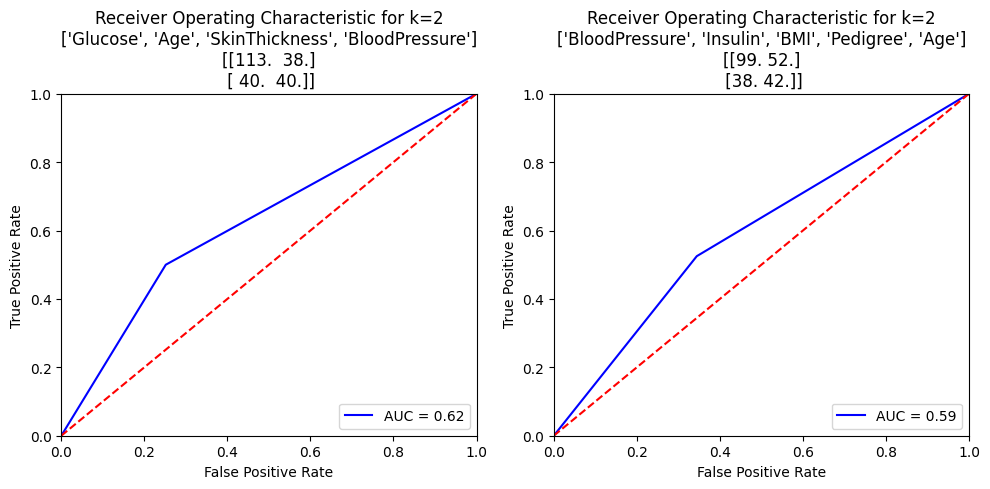

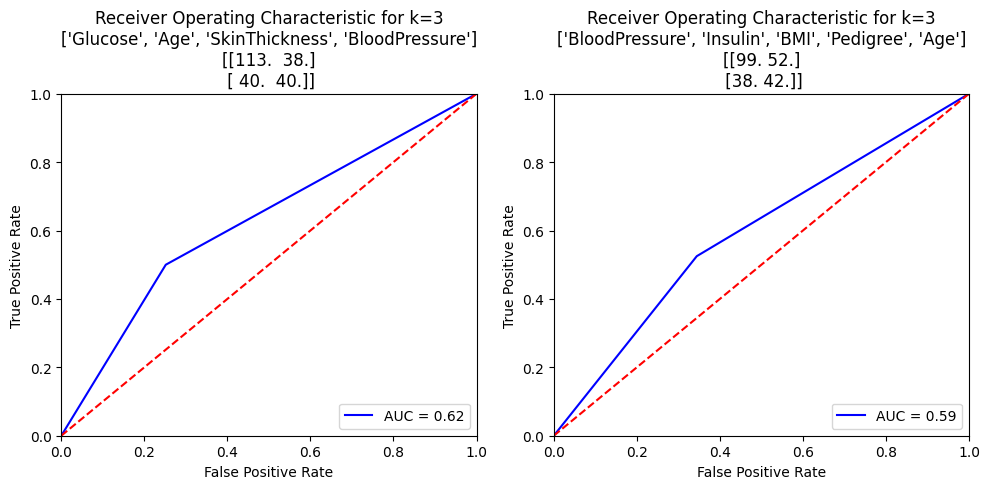

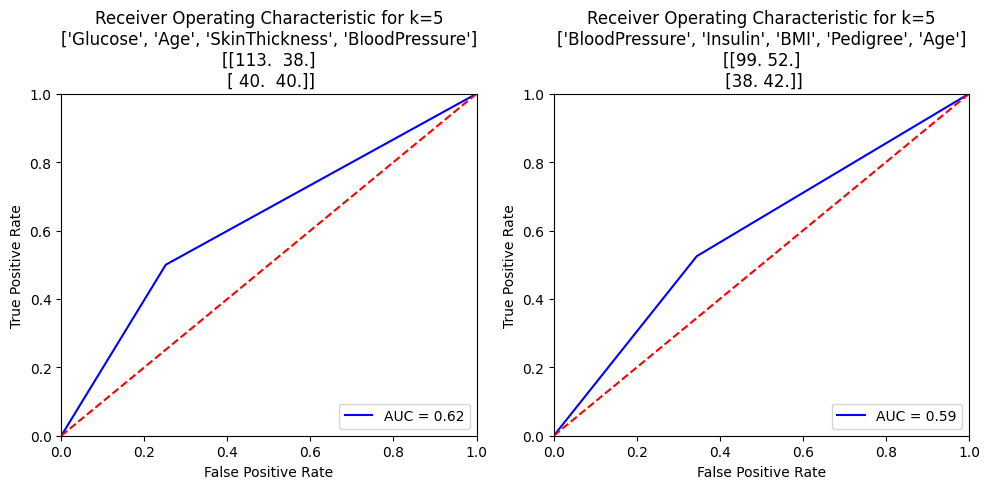

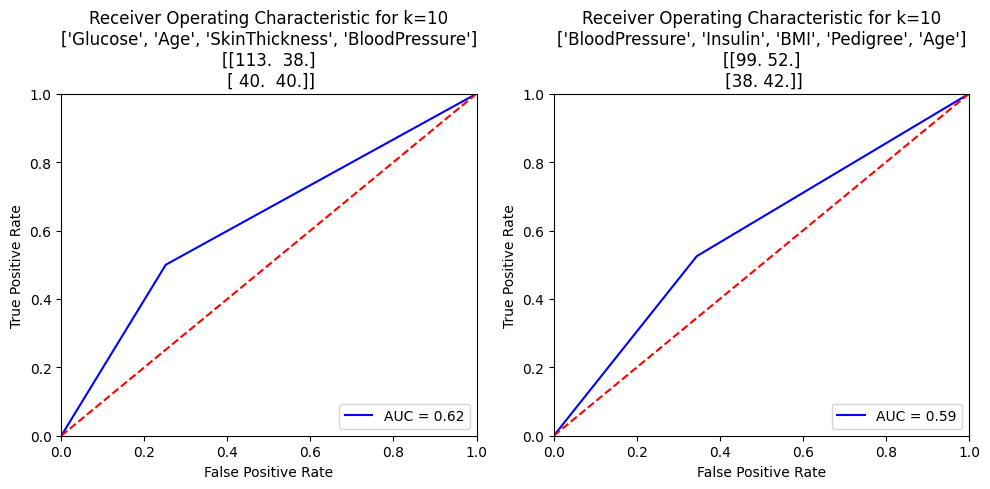

In [15]:
for i, k in enumerate([2, 3, 5, 10]):
    plt.figure(figsize=(10,5))

    plt.subplot(1, 2, 1)
    analyse(x=ds_m1, y=ts, k=k)

    plt.subplot(1, 2, 2)
    analyse(x=ds_m2, y=ts, k=k)

    plt.tight_layout()
    plt.show()


Как можно видеть, наша модель по метрике ROC AUC не превышает 0.7. В целом это хороший результат, но не идеальный. Как ранее замечалось, разделить данные на классы достаточно качественно визуально тоже не удается. Поэтому модель справляется хорошо. 